# Walmart EDA product | customer | Stores 

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: Jan 20 2025

In [7]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.3/124.9 MB 2.9 MB/s eta 0:00:43
    --------------------------------------- 1.6/124.9 MB 2.4 MB/s eta 0:00:52
    --------------------------------------- 1.6/124.9 MB 2.4 MB/s eta 0:00:52
    --------------------------------------- 1.8/124.9 MB 1.7 MB/s eta 0:01:14
    --------------------------------------- 2.1/124.9 MB 1.5 MB/s eta 0:01:22
    --------------------------------------- 2.4/124.9 MB 1.5 MB/s eta 0:01:23
    --------------------------------------- 2.9/124.9 MB 1.6 MB/s eta 0:01:19
   - -------------------------------------- 3.1/124.9 MB 1.5 MB/s eta 0:01:21
   - -------------------------------------- 3.1/124.9 MB 1.5 MB/s eta 0:01:21
   - -------------------------------------- 3.4/124.9 MB 1.4 MB/s eta 0:01:26
   - -------------------------------------- 3.7/124.9 MB 1.4 MB/s eta 0


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Walmart/Walmart.csv")

In [15]:
data.head(3)

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category                5000 non-null   object 
 5   quantity_sold           5000 non-null   int64  
 6   unit_price              5000 non-null   float64
 7   transaction_date        5000 non-null   object 
 8   store_id                5000 non-null   int64  
 9   store_location          5000 non-null   object 
 10  inventory_level         5000 non-null   int64  
 11  reorder_point           5000 non-null   int64  
 12  reorder_quantity        5000 non-null   int64  
 13  supplier_id             5000 non-null   int64  
 14  supplier_lead_time      5000 non-null   

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,5000.0,2500.500000,1443.520003,1.00,1250.7500,2500.500,3750.2500,5000.00
customer_id,5000.0,5542.497200,2582.126997,1001.00,3279.0000,5558.000,7767.2500,9998.00
product_id,5000.0,551.233400,258.826606,100.00,322.0000,559.000,776.0000,999.00
quantity_sold,5000.0,2.982800,1.419474,1.00,2.0000,3.000,4.0000,5.00
unit_price,5000.0,1023.467294,559.614242,50.10,537.7750,1029.175,1506.3075,1999.85
store_id,5000.0,10.525000,5.786888,1.00,5.0000,11.000,16.0000,20.00
inventory_level,5000.0,253.121800,142.885456,0.00,130.0000,253.000,377.2500,500.00
reorder_point,5000.0,99.788000,29.132387,50.00,75.0000,100.000,125.0000,150.00
reorder_quantity,5000.0,200.517000,58.257381,100.00,150.7500,200.500,251.0000,300.00
supplier_id,5000.0,300.125600,116.394860,100.00,199.0000,299.000,405.0000,500.00


In [21]:
data.isnull().sum()

transaction_id               0
customer_id                  0
product_id                   0
product_name                 0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
reorder_point                0
reorder_quantity             0
supplier_id                  0
supplier_lead_time           0
customer_age                 0
customer_gender              0
customer_income              0
customer_loyalty_level       0
payment_method               0
promotion_applied            0
promotion_type            3407
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64

## Data Preprocessing

In [23]:
data= data.drop('promotion_type', axis= 1)

In [25]:
data['transaction_date'] =pd.to_datetime(data['transaction_date'], infer_datetime_format = True)

In [27]:
data.stockout_indicator = data.stockout_indicator.astype(int)
data.holiday_indicator = data.holiday_indicator.astype(int)
data.promotion_applied = data.promotion_applied.astype(int)

## Analysis And Visualization

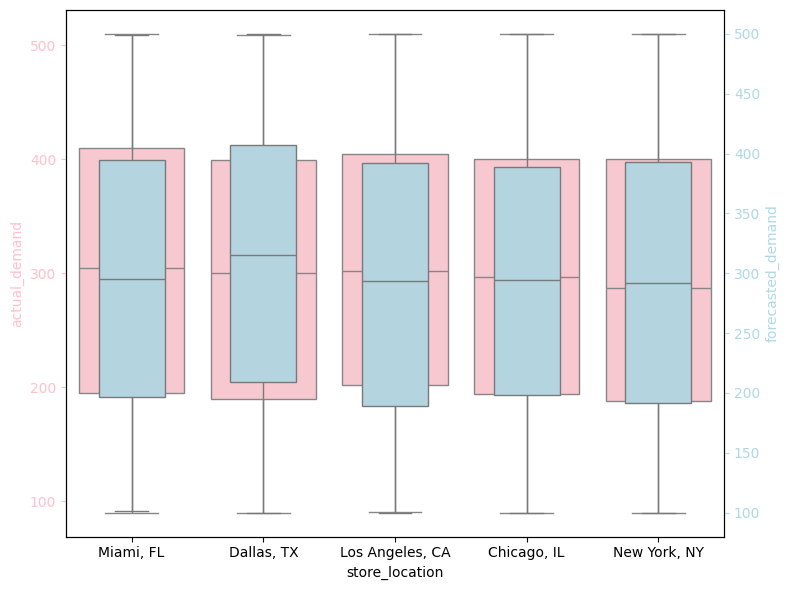

In [30]:
fig,ax1= plt.subplots(figsize=(8,6))

ax1=sns.boxplot(data,x='store_location',y='actual_demand', color = 'pink')
ax1.set_ylabel('actual_demand', color = 'pink')
ax1.tick_params(axis='y', colors='pink')
ax2 = ax1.twinx()
ax2 = sns.boxplot(data,x='store_location',y='forecasted_demand', color = 'lightblue' , width = 0.5)
ax2.set_ylabel('forecasted_demand', color = 'lightblue')
ax2.tick_params(axis='y', colors='lightblue')
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

<Axes: xlabel='stockout_indicator', ylabel='store_location'>

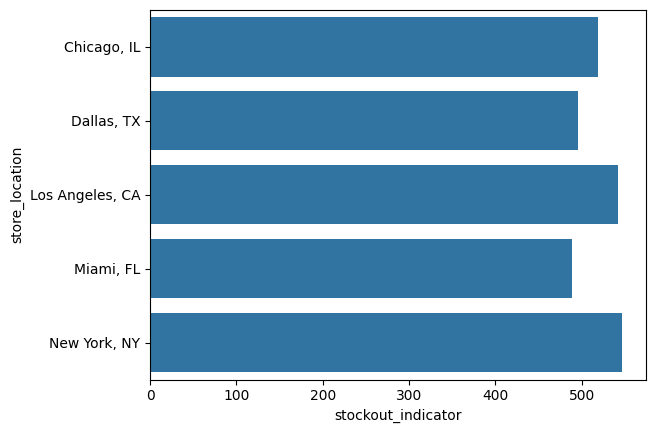

In [32]:
each_store_stockout = data.groupby('store_location').agg({'stockout_indicator':'sum'}) .reset_index()
sns.barplot(each_store_stockout, y = 'store_location', x='stockout_indicator')

<Axes: xlabel='quantity_sold', ylabel='store_location'>

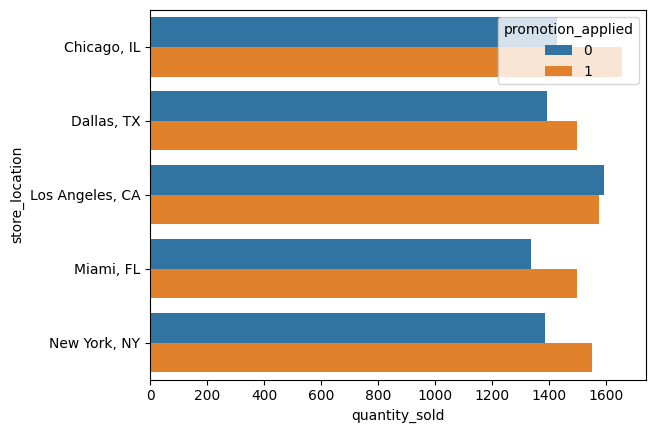

In [34]:
each_store_stockout = data.groupby(['store_location','promotion_applied']).agg({'quantity_sold':'sum'}) .reset_index()
sns.barplot(each_store_stockout, y = 'store_location', x='quantity_sold',hue='promotion_applied')

<Axes: xlabel='inventory_level', ylabel='store_location'>

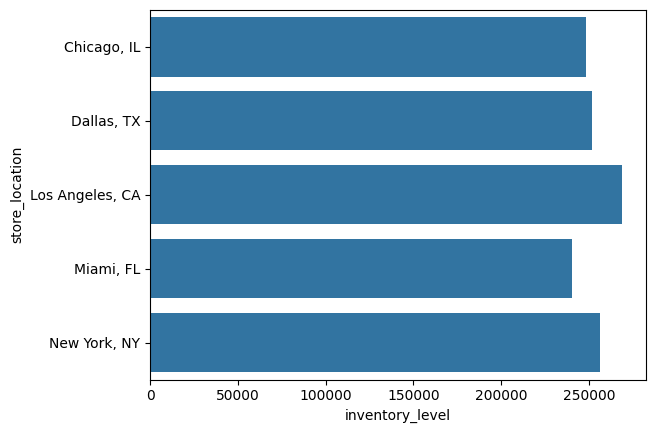

In [36]:
sns.barplot(data.groupby('store_location').inventory_level.sum().reset_index(), y = 'store_location', x = 'inventory_level')

<Axes: xlabel='inventory_level', ylabel='actual_demand'>

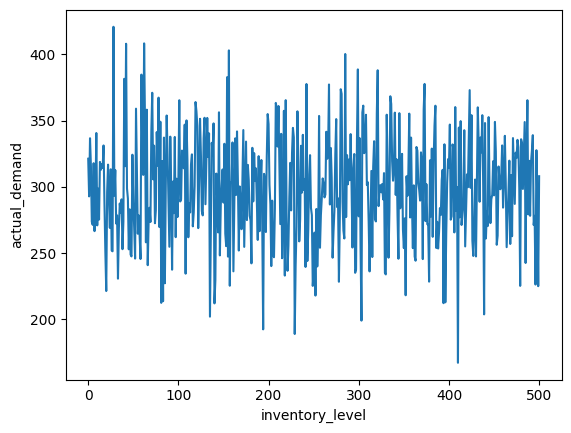

In [38]:
sns.lineplot(data, x = 'inventory_level', y = 'actual_demand', errorbar=None)

<Axes: xlabel='promotion_applied', ylabel='stockout_indicator'>

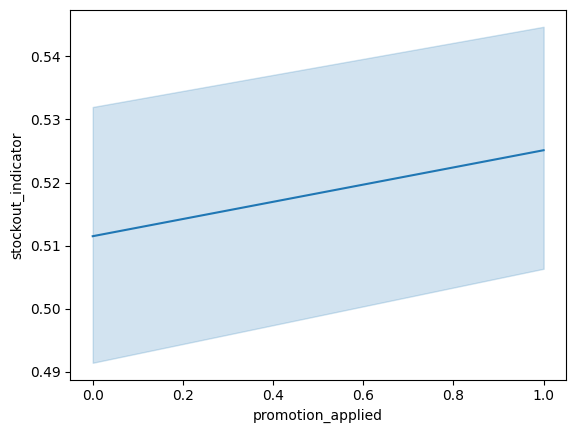

In [40]:
sns.lineplot(data , x = 'promotion_applied' , y = 'stockout_indicator')

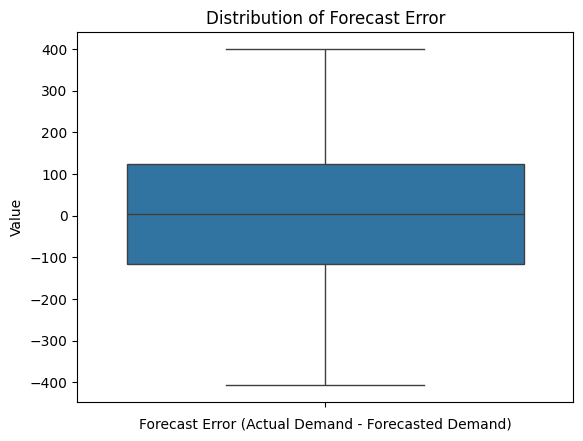

In [42]:
sns.boxplot(data['actual_demand'] - data['forecasted_demand'])
plt.title("Distribution of Forecast Error")
plt.xlabel("Forecast Error (Actual Demand - Forecasted Demand)")
plt.ylabel("Value")
plt.show()

## Product Analysis

Text(0.5, 1.0, 'total quantity sold for each product')

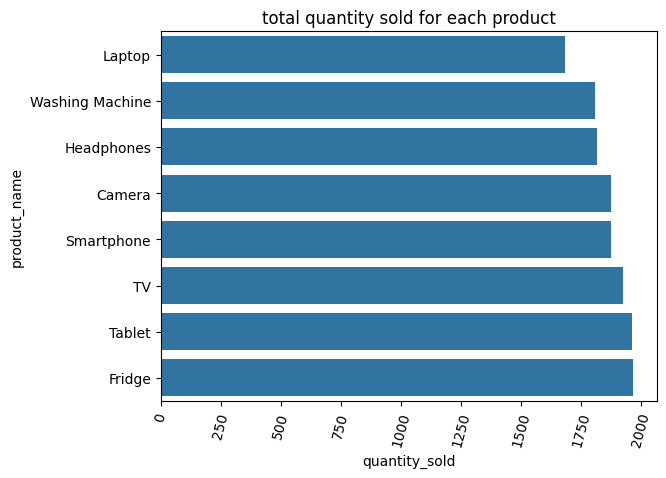

In [45]:
total_quantity_sold_per_product = data.groupby(['product_name']).agg({'quantity_sold':'sum' }).reset_index()
total_quantity_sold_per_product = total_quantity_sold_per_product.sort_values('quantity_sold')
sns.barplot(total_quantity_sold_per_product, y= 'product_name',x= 'quantity_sold')
plt.xticks(rotation = 75)
plt.title('total quantity sold for each product')

Text(0.5, 1.0, 'total quantity sold for each product')

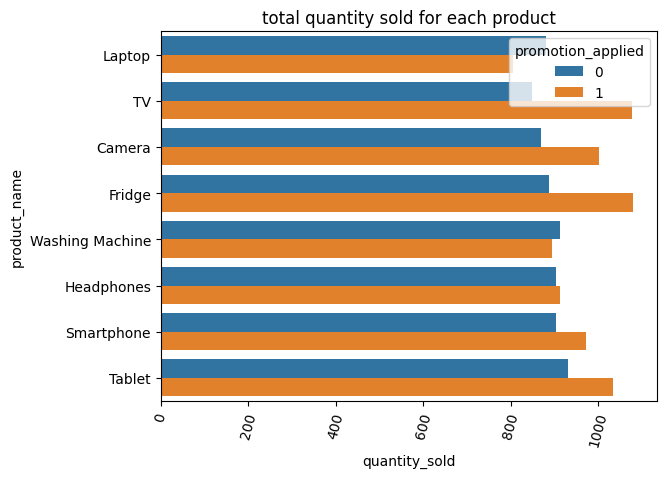

In [47]:
total_quantity_sold_per_product = data.groupby(['product_name','promotion_applied']).agg({'quantity_sold':'sum' }).reset_index()
total_quantity_sold_per_product = total_quantity_sold_per_product.sort_values('quantity_sold')
sns.barplot(total_quantity_sold_per_product, y= 'product_name',x= 'quantity_sold', hue= 'promotion_applied')
plt.xticks(rotation = 75)
plt.title('total quantity sold for each product')

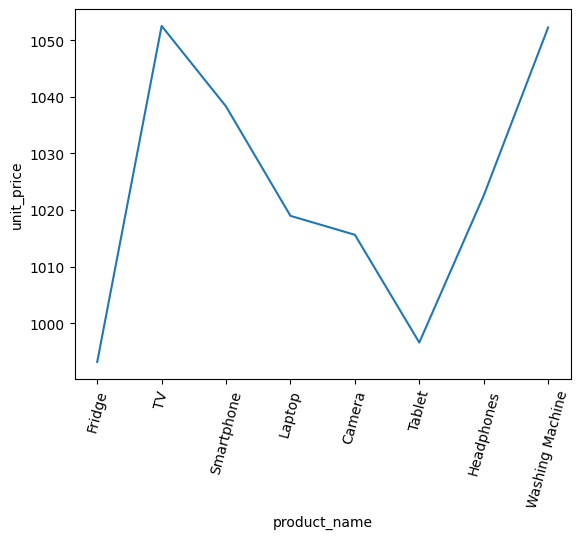

In [49]:
sns.lineplot(data, y= 'unit_price', x  = 'product_name',errorbar= None)
plt.xticks(rotation= 75)
plt.show()

In [51]:
sold_units_per_month_product = data.groupby([data['transaction_date'].dt.month,'product_name','promotion_applied']).agg({'quantity_sold':'sum'}).reset_index()

In [53]:
product_subset = data['product_name'].value_counts().index

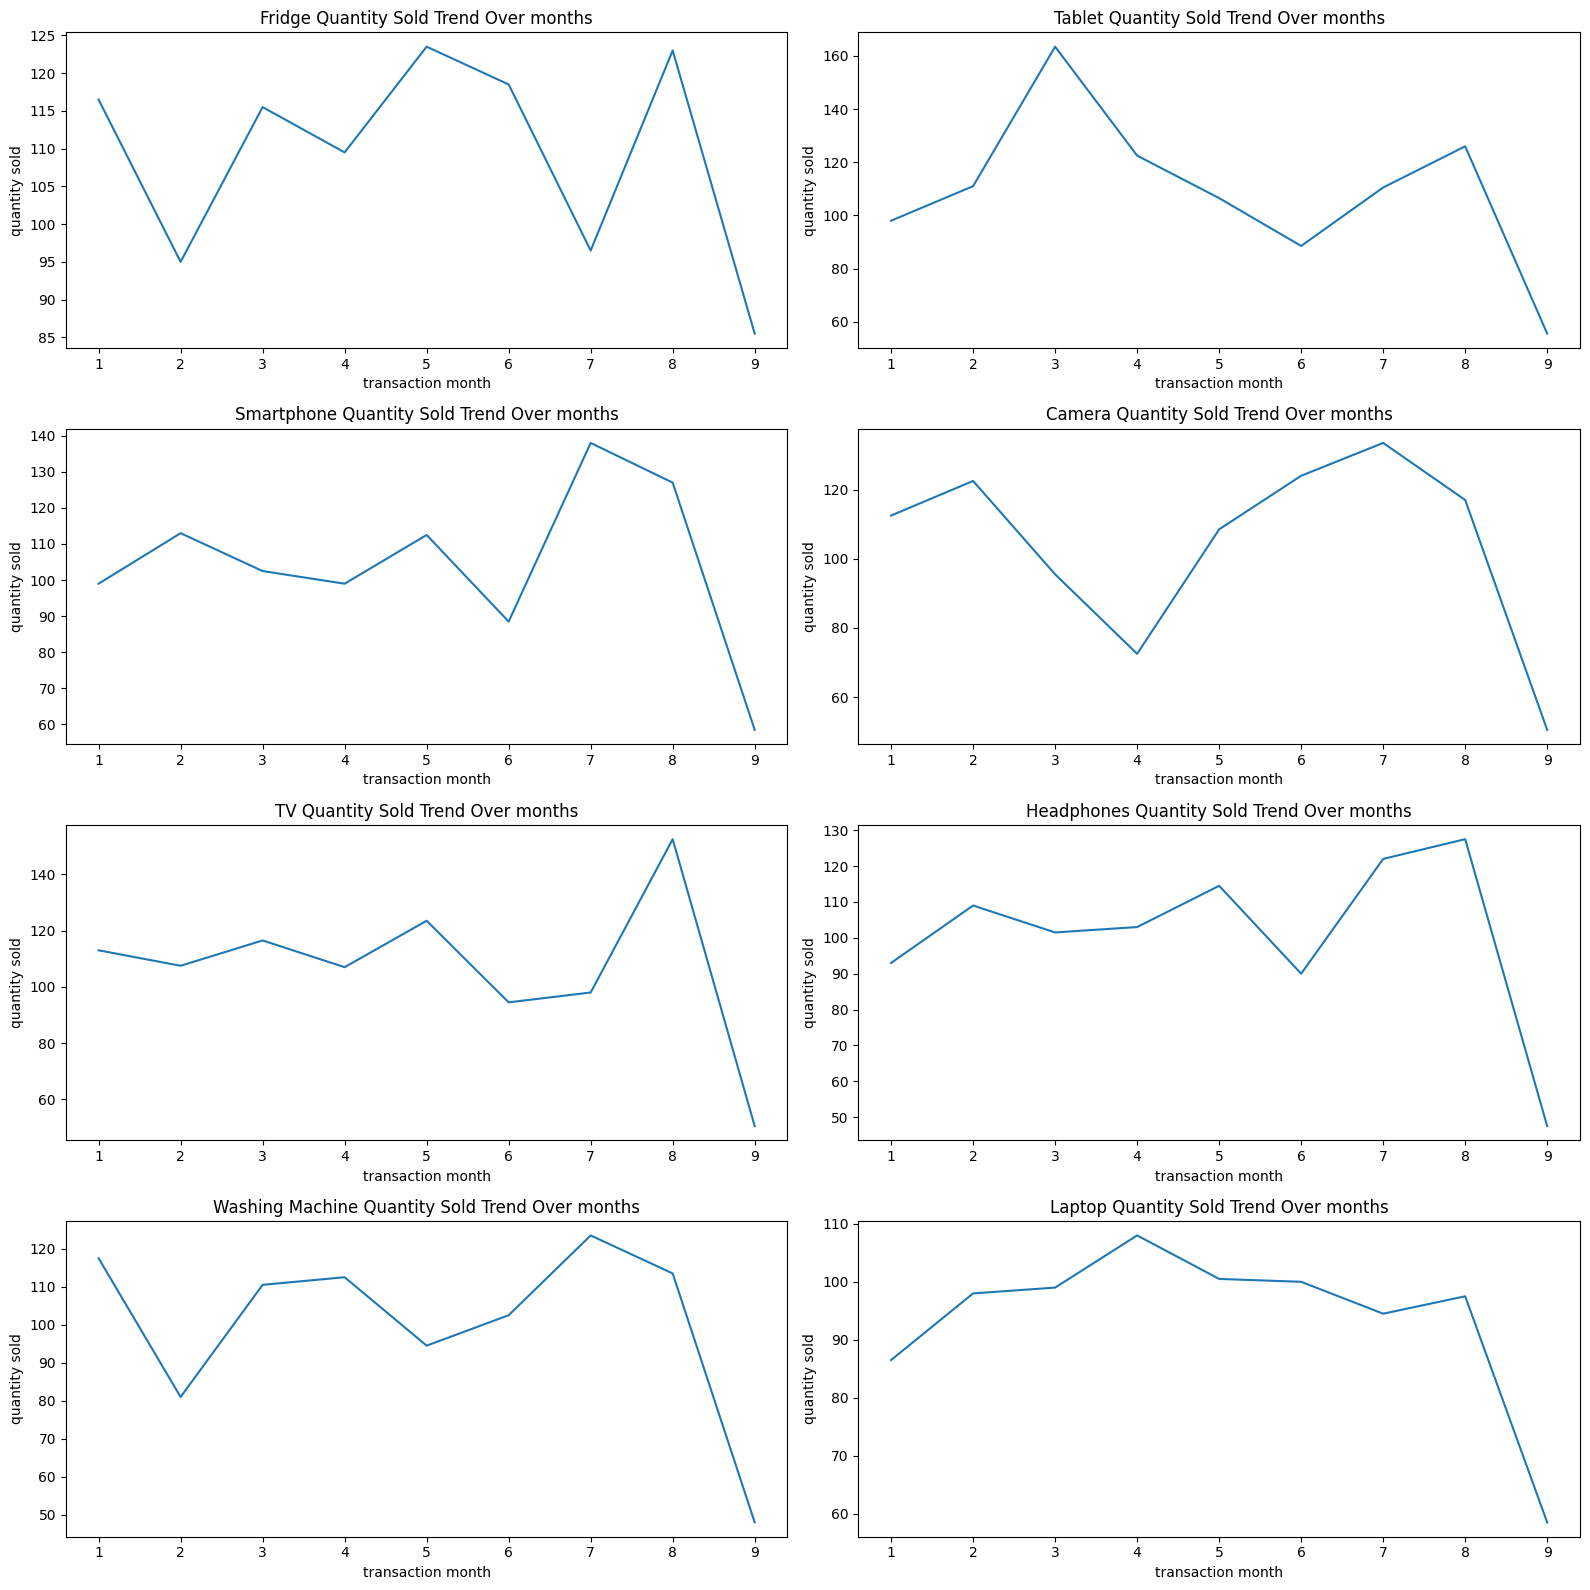

In [55]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot data with seaborn using hue in each subplot
for i, ax in  enumerate(axes):
    subset = sold_units_per_month_product[sold_units_per_month_product['product_name'] == product_subset[i]]
    sns.lineplot(subset, x='transaction_date', y='quantity_sold', ax=ax, palette='viridis', errorbar=None)
    ax.set_title(f'{product_subset[i]} Quantity Sold Trend Over months')
    ax.set_xlabel('transaction month')
    ax.set_ylabel('quantity sold')
plt.tight_layout()

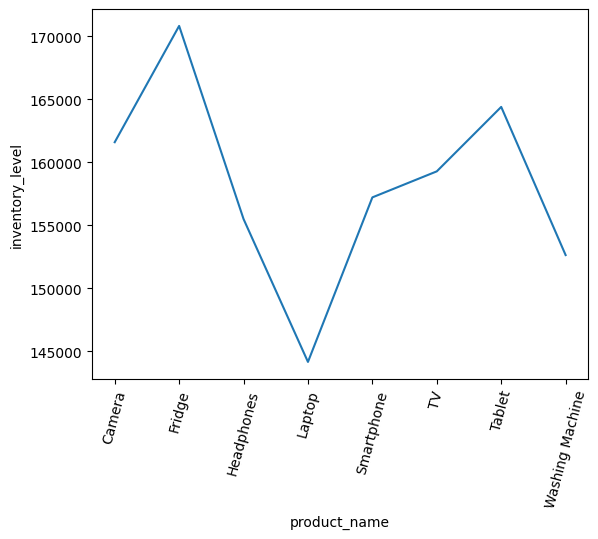

In [57]:
sns.lineplot(data.groupby(['product_name']).inventory_level.sum().reset_index() , x = 'product_name',y='inventory_level')
plt.xticks(rotation=75)
plt.show()

<Axes: xlabel='transaction_id', ylabel='weather_conditions'>

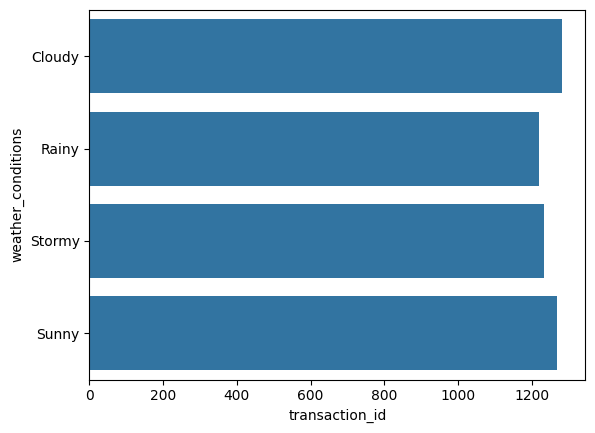

In [59]:
sns.barplot(data.groupby('weather_conditions').agg({'transaction_id': 'count'}).reset_index(), y = 'weather_conditions', x = 'transaction_id', errorbar = None)

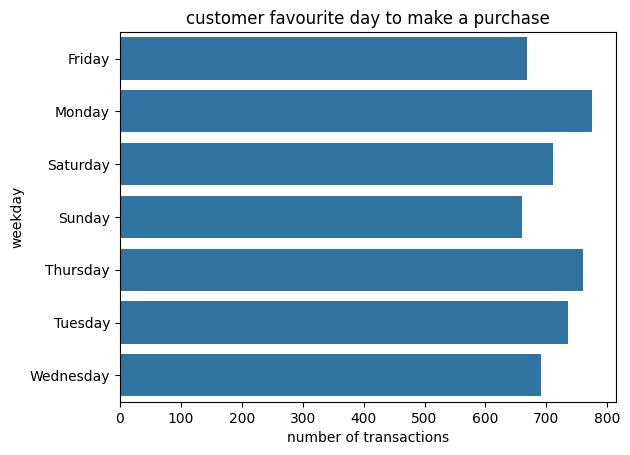

In [61]:
sns.barplot(data.groupby(['weekday']).transaction_id.count().reset_index() , y = 'weekday',x='transaction_id')
plt.xlabel('number of transactions')
plt.title("customer favourite day to make a purchase")
plt.show()

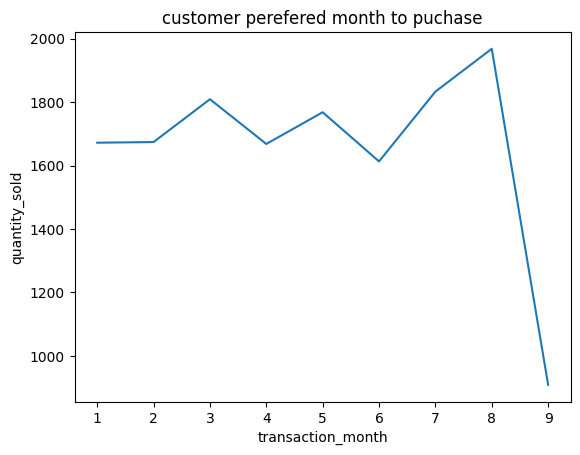

In [63]:
sold_units_per_month = data.groupby([data['transaction_date'].dt.month]).agg({'quantity_sold':'sum'}).reset_index()
sns.lineplot(sold_units_per_month , x= 'transaction_date'  ,y ='quantity_sold', errorbar=None)
plt.xlabel('transaction_month')
plt.title("customer perefered month to puchase")
plt.show()

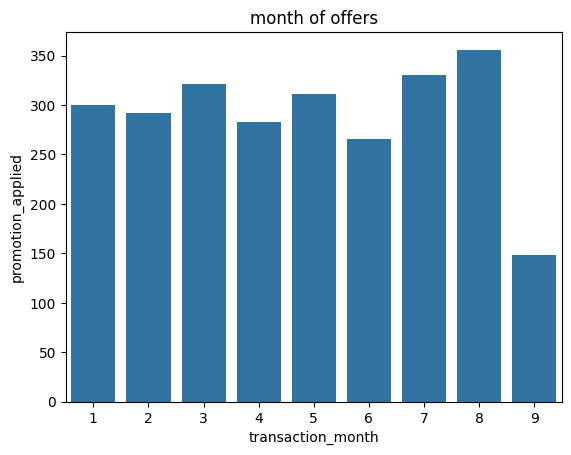

In [65]:
sold_units_per_month = data.groupby([data['transaction_date'].dt.month]).agg({'promotion_applied':'sum'}).reset_index()
sns.barplot(sold_units_per_month , x= 'transaction_date'  ,y ='promotion_applied', errorbar=None)
plt.xlabel('transaction_month')
plt.title("month of offers")
plt.show()

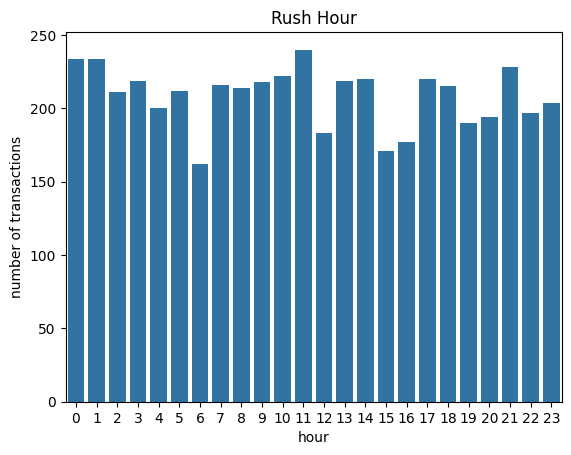

In [67]:
sold_units_per_month = data.groupby([data['transaction_date'].dt.hour]).agg({'transaction_id':'count'}).reset_index()
sns.barplot(sold_units_per_month , x= 'transaction_date'  ,y ='transaction_id', errorbar=None)
plt.xlabel('hour')
plt.ylabel('number of transactions')
plt.title("Rush Hour")
plt.show()

In [69]:
data.loc[data['customer_income'] <= data['customer_income'].quantile(0.25), 'customer_income_category']= 'forth'
data.loc[data['customer_income'].between(data['customer_income'].quantile(0.25),data['customer_income'].quantile(0.50)), 'customer_income_category']= 'third'
data.loc[data['customer_income'].between(data['customer_income'].quantile(0.50),data['customer_income'].quantile(0.75)) , 'customer_income_category']= 'second'
data.loc[data['customer_income'] >= data['customer_income'].quantile(0.75), 'customer_income_category']= 'first'

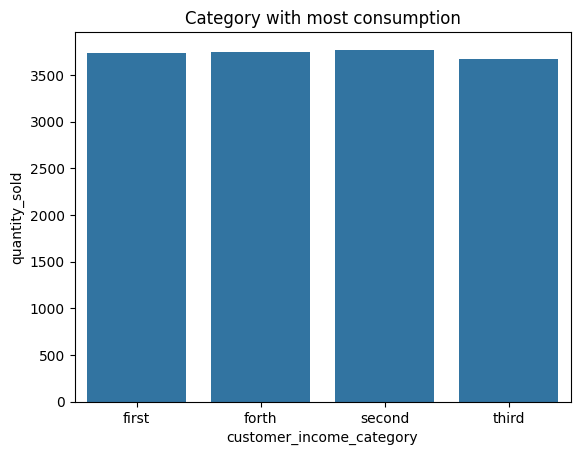

In [71]:
sns.barplot(data.groupby(['customer_income_category']).quantity_sold.sum().reset_index(), x = 'customer_income_category', y= 'quantity_sold')
plt.title('Category with most consumption')
plt.show()

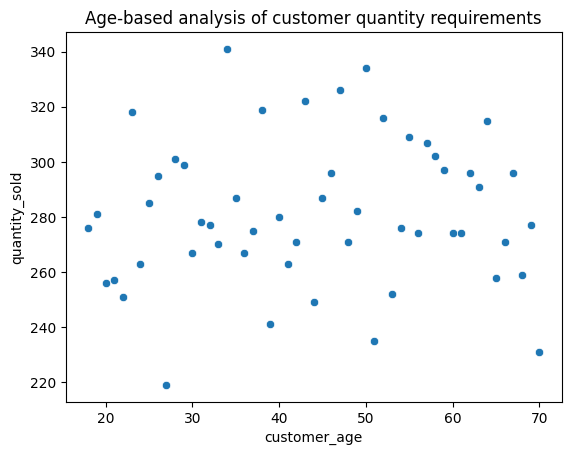

In [73]:
sns.scatterplot(data.groupby(['customer_age']).quantity_sold.sum().reset_index(), x = 'customer_age', y= 'quantity_sold')
plt.title('Age-based analysis of customer quantity requirements')
plt.show()

## Train And Test Modele

In [ ]:
data  = pd.get_dummies(data, columns=['weekday','weather_conditions','payment_method','store_location','category','product_name','customer_gender'])

In [77]:
le = LabelEncoder()
data['customer_income_category'] = le.fit_transform(data['customer_income_category'])
data['customer_loyalty_level'] = le.fit_transform(data['customer_loyalty_level'])

In [79]:
encoder = ce.TargetEncoder(cols=['product_id','store_id','supplier_id','customer_id'])
data[['product_id','store_id','supplier_id','customer_id']] = encoder.fit_transform(data[['product_id','store_id','supplier_id','customer_id']], data['actual_demand'])

In [81]:
data = data.drop('transaction_id', axis= 1)

In [83]:
data['transaction_month'] = data['transaction_date'].dt.month
data['transaction_hour'] = data['transaction_date'].dt.hour

In [85]:
data = data.drop('transaction_date', axis= 1)

In [87]:
data = data.drop('forecasted_demand', axis= 1)

In [89]:
X = data.drop('actual_demand', axis= 1)
y = data['actual_demand']

In [91]:
scaler = MinMaxScaler()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Modeling

In [98]:
r2_scores=[]
# Define models
models = {
    "XGBoost": XGBRegressor(n = 500),
    "SVR": SVR(kernel='linear'),
    "Linear Regression": LinearRegression(),
     "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Loop through models
for model_name, model in models.items():
    print(f"\n=== {model_name} ===")

    # Train the model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluate regression performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((model_name,r2))
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")


=== XGBoost ===
Mean Squared Error: 4128.82
R² Score: 0.72

=== SVR ===
Mean Squared Error: 3476.10
R² Score: 0.77

=== Linear Regression ===
Mean Squared Error: 3361.68
R² Score: 0.77

=== Random Forest Regressor ===
Mean Squared Error: 3560.06
R² Score: 0.76

=== Decision Tree Regressor ===
Mean Squared Error: 6867.32
R² Score: 0.54

=== Gradient Boosting Regressor ===
Mean Squared Error: 3434.45
R² Score: 0.77


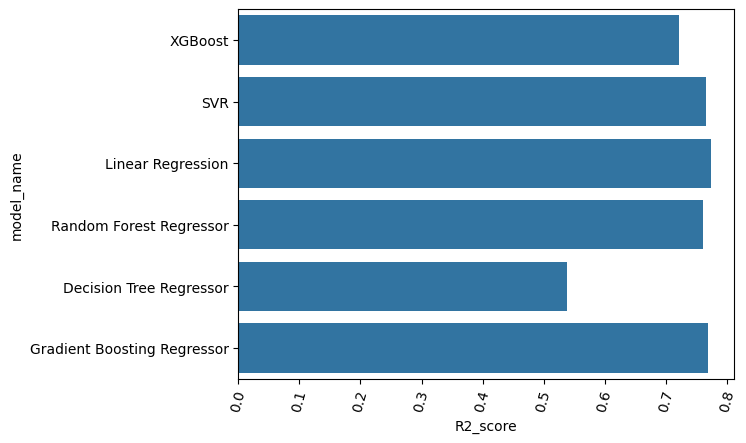

In [100]:
df = pd.DataFrame(r2_scores, columns=['model_name', 'R2_score'])

# Create a bar plot using Seaborn
sns.barplot(y='model_name', x='R2_score', data=df)
plt.xticks(rotation=75)
plt.show()